In [ ]:
%pip install geopandas
%pip install contextily
%pip install folium
%pip install folium.plugins

In [2]:
import pandas as pd
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

In [3]:
with zipfile.ZipFile('..\data\interim\ebirdSonora.zip') as z:
    with z.open('ebirdSonora.csv') as f:
        df = pd.read_csv(f)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_21652\4061534289.py:1: SyntaxWarning: invalid escape sequence '\d'
  with zipfile.ZipFile('..\data\interim\ebirdSonora.zip') as z:


FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\interim\\ebirdSonora.zip'

# Descriptivo

In [10]:
df.head()

,basisofrecord,institutioncode,collectioncode,catalognumber,occurrenceid,recordedby,year,month,day,publishingcountry,...,class,order,family,genus,specificepithet,scientificname,vernacularname,taxonremarks,taxonconceptid,individualcount
0,HumanObservation,CLO,EBIRD,OBS1000397761,URN:catalog:CLO:EBIRD:OBS1000397761,obsr1203672,2020,10,20,MX,...,Aves,Columbiformes,Columbidae,Columba,livia,Columba livia,Rock Pigeon,NaN,avibase-avibase-BBA263C2,1.0
1,HumanObservation,CLO,EBIRD,OBS1000397738,URN:catalog:CLO:EBIRD:OBS1000397738,obsr1203672,2020,10,20,MX,...,Aves,Passeriformes,Passeridae,Passer,domesticus,Passer domesticus,House Sparrow,NaN,avibase-avibase-240E3390,1.0
2,HumanObservation,CLO,EBIRD,OBS1000397737,URN:catalog:CLO:EBIRD:OBS1000397737,obsr1203672,2020,10,20,MX,...,Aves,Passeriformes,Tyrannidae,Sayornis,saya,Sayornis saya,Say's Phoebe,NaN,avibase-avibase-28669A3D,1.0
3,HumanObservation,CLO,EBIRD,OBS1000397739,URN:catalog:CLO:EBIRD:OBS1000397739,obsr1203672,2020,10,20,MX,...,Aves,Columbiformes,Columbidae,Columbina,inca,Columbina inca,Inca Dove,NaN,avibase-avibase-BFE74235,1.0
4,HumanObservation,CLO,EBIRD,OBS1000397740,URN:catalog:CLO:EBIRD:OBS1000397740,obsr1203672,2020,10,20,MX,...,Aves,Strigiformes,Strigidae,Athene,cunicularia,Athene cunicularia,Burrowing Owl,NaN,avibase-avibase-B9EE9676,1.0


In [11]:
for col in df.columns:
    #print(col,'(',len(df[col].unique()),')')
    #[print(i) for i in df[col].unique()]
    #print(*df[col].unique())
    print(df[col].value_counts())
    print('Unicos',len(df[col].unique()))
    print('*'*50)

basisofrecord
HumanObservation    862409
Name: count, dtype: int64
Unicos 1
**************************************************
institutioncode
CLO    862409
Name: count, dtype: int64
Unicos 1
**************************************************
collectioncode
EBIRD    862409
Name: count, dtype: int64
Unicos 1
**************************************************
catalognumber
OBS1021537345    1
OBS1000397761    1
OBS1000397738    1
OBS1000397737    1
OBS1000397739    1
                ..
OBS1000397751    1
OBS1000397750    1
OBS1000397747    1
OBS1000397746    1
OBS1000397745    1
Name: count, Length: 862409, dtype: int64
Unicos 862409
**************************************************
occurrenceid
URN:catalog:CLO:EBIRD:OBS1021537345    1
URN:catalog:CLO:EBIRD:OBS1000397761    1
URN:catalog:CLO:EBIRD:OBS1000397738    1
URN:catalog:CLO:EBIRD:OBS1000397737    1
URN:catalog:CLO:EBIRD:OBS1000397739    1
                                      ..
URN:catalog:CLO:EBIRD:OBS1000397751    1
URN:catalo

In [11]:
df.describe()

,year,month,day,decimallatitude,decimallongitude,taxonremarks,individualcount
count,862409.000000,862409.000000,862409.000000,862409.000000,862409.000000,0.0,797235.000000
mean,2017.374238,6.570577,15.423820,28.722557,-110.767048,NaN,11.208622
std,8.059620,3.957056,8.471791,1.569332,1.652004,NaN,93.953202
min,1887.000000,1.000000,1.000000,26.324192,-115.052444,NaN,1.000000
25%,2016.000000,3.000000,8.000000,27.103651,-111.453415,NaN,1.000000
50%,2019.000000,6.000000,15.000000,28.461292,-110.927080,NaN,2.000000
75%,2023.000000,11.000000,22.000000,29.183807,-109.083595,NaN,5.000000
max,2024.000000,12.000000,31.000000,32.491627,-108.518930,NaN,18570.000000


In [12]:
df.describe(include='object')

,basisofrecord,institutioncode,collectioncode,catalognumber,occurrenceid,recordedby,publishingcountry,country,stateprovince,county,...,kingdom,phylum,class,order,family,genus,specificepithet,scientificname,vernacularname,taxonconceptid
count,862409,862409,862409,862409,862409,862409,862409,862409,862409,862401,...,862409,862409,862409,862409,862409,862409,862409,862409,862409,862409
unique,1,1,1,862409,862409,2191,1,1,1,71,...,1,1,1,25,77,282,475,545,545,545
top,HumanObservation,CLO,EBIRD,OBS1021537345,URN:catalog:CLO:EBIRD:OBS1021537345,obsr1203672,MX,Mexico,Sonora,Hermosillo,...,Animalia,Chordata,Aves,Passeriformes,Columbidae,Zenaida,mexicanus,Cathartes aura,Turkey Vulture,avibase-avibase-36B3872D
freq,862409,862409,862409,1,1,49396,862409,862409,862409,229734,...,862409,862409,862409,383122,69574,30433,35030,19101,19101,19101


In [21]:
df.isna().sum()

basisofrecord             0
institutioncode           0
collectioncode            0
catalognumber             0
occurrenceid              0
recordedby                0
year                      0
month                     0
day                       0
publishingcountry         0
country                   0
stateprovince             0
county                    8
decimallatitude           0
decimallongitude          0
locality                  0
kingdom                   0
phylum                    0
class                     0
order                     0
family                    0
genus                     0
specificepithet           0
scientificname            0
vernacularname            0
taxonremarks         862409
taxonconceptid            0
individualcount           0
dtype: int64

# Correccion

In [25]:
df[df['county'].isna()][['decimallatitude','decimallongitude']] # Parece ser de una sub isla del tiburon

,decimallatitude,decimallongitude
305363,28.718594,-112.29452
305364,28.718594,-112.29452
305365,28.718594,-112.29452
305366,28.718594,-112.29452
305367,28.718594,-112.29452
305368,28.718594,-112.29452
305369,28.718594,-112.29452
305370,28.718594,-112.29452


In [48]:
df['individualcount']=df['individualcount'].fillna(1)

In [49]:
df['fecha']=pd.to_datetime(df[['year','month','day']])
df['fecha'].describe()

count                           862409
mean     2017-11-16 14:27:12.614686976
min                1887-03-31 00:00:00
25%                2016-03-06 00:00:00
50%                2019-12-14 00:00:00
75%                2023-01-11 00:00:00
max                2024-12-31 00:00:00
Name: fecha, dtype: object

## eliminar columnas redundantes

In [50]:
df = df.drop(columns=['basisofrecord','institutioncode','collectioncode','catalognumber','occurrenceid','publishingcountry','country','stateprovince','kingdom','phylum','class','scientificname','taxonconceptid','taxonremarks'])
df.head()

,recordedby,year,month,day,county,decimallatitude,decimallongitude,locality,order,family,genus,specificepithet,vernacularname,individualcount,fecha
0,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Columbiformes,Columbidae,Columba,livia,Rock Pigeon,1.0,2020-10-20
1,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Passeriformes,Passeridae,Passer,domesticus,House Sparrow,1.0,2020-10-20
2,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Passeriformes,Tyrannidae,Sayornis,saya,Say's Phoebe,1.0,2020-10-20
3,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Columbiformes,Columbidae,Columbina,inca,Inca Dove,1.0,2020-10-20
4,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Strigiformes,Strigidae,Athene,cunicularia,Burrowing Owl,1.0,2020-10-20


# EDA

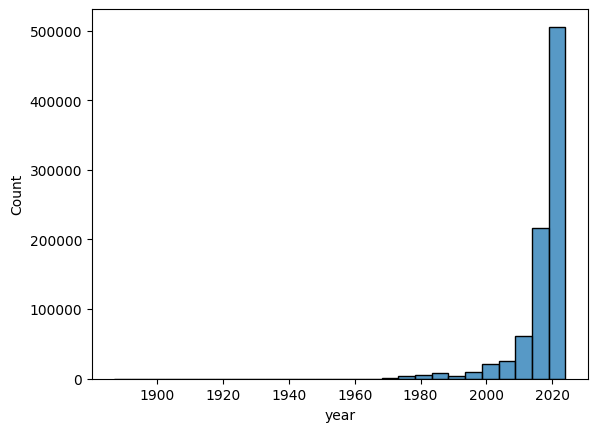

In [133]:
sns.histplot(data=df,x='year',binwidth=5);

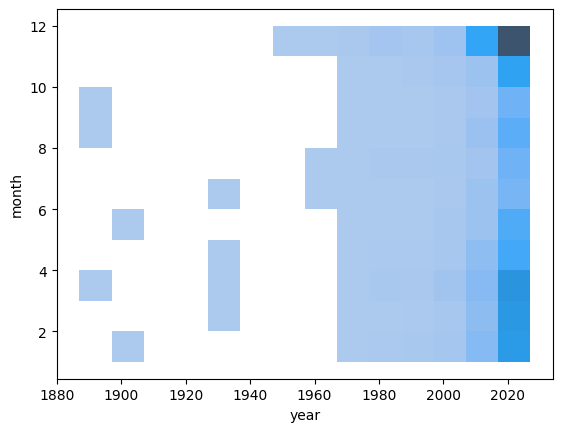

In [136]:
sns.histplot(data=df,x='year',y='month',binwidth=[10,1]);

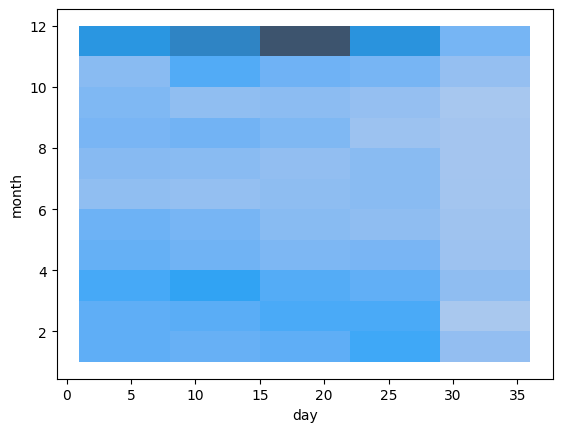

In [145]:
sns.histplot(data=df,x='day',y='month',binwidth=[7,1]);

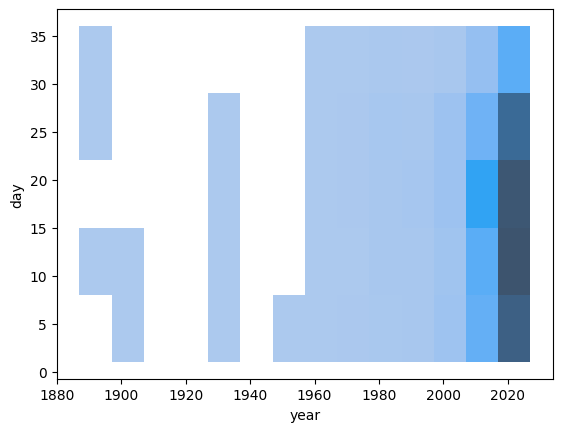

In [146]:
sns.histplot(data=df,x='year',y='day',binwidth=[10,7]);

<Axes: xlabel='year', ylabel='individualcount'>

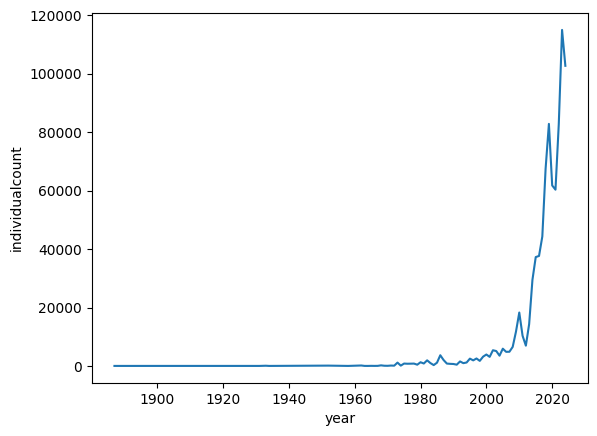

In [ ]:
observations_by_year = df.groupby('year').count()[['individualcount']]
sns.lineplot(data=observations_by_year,x='year',y='individualcount');

In [157]:
top_municipios = df.groupby('county').count()[['individualcount']].sort_values('individualcount',ascending=False).head().index.to_list()
[print(i) for i in top_municipios];

Hermosillo
Alamos
Guaymas
Puerto Peñasco
San Luis Río Colorado


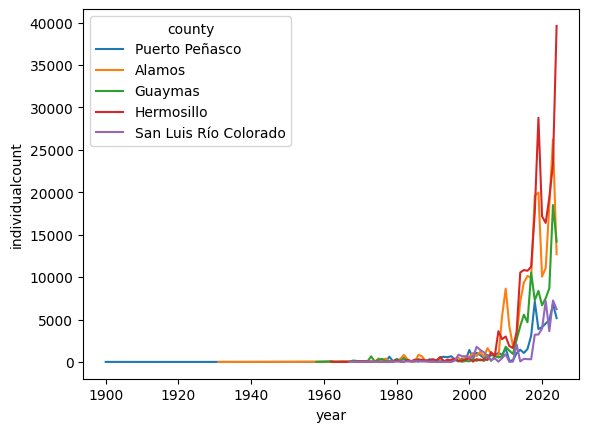

In [158]:
observations_by_year_municipio = df[df['county'].isin(top_municipios)].groupby(['year','county']).count()[['individualcount']].reset_index()
sns.lineplot(data=observations_by_year_municipio,x='year',y='individualcount',hue='county');

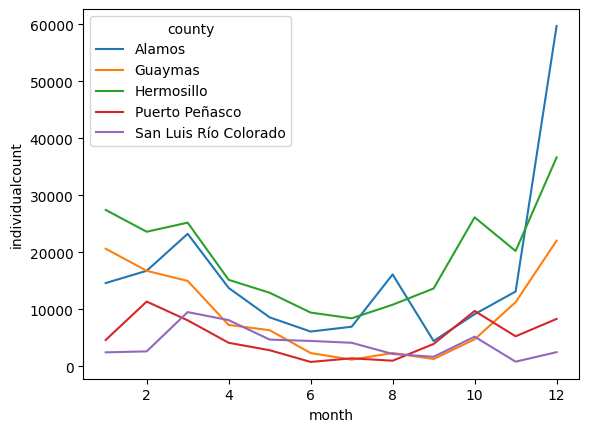

In [159]:
observations_by_year = df[df['county'].isin(top_municipios)].groupby(['month','county']).count()[['individualcount']].reset_index()
sns.lineplot(data=observations_by_year,x='month',y='individualcount',hue='county');

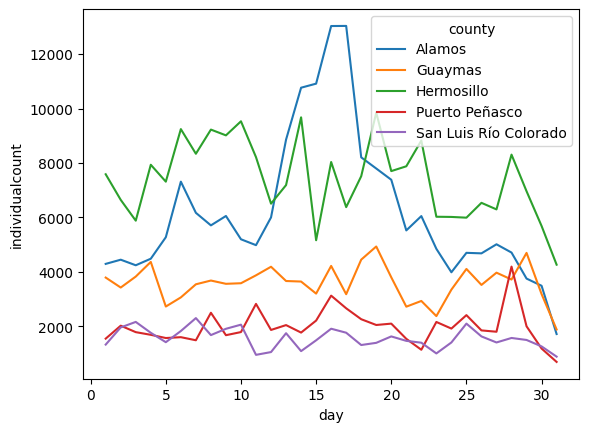

In [160]:
observations_by_year = df[df['county'].isin(top_municipios)].groupby(['day','county']).count()[['individualcount']].reset_index()
sns.lineplot(data=observations_by_year,x='day',y='individualcount',hue='county');

<Axes: xlabel='day', ylabel='individualcount'>

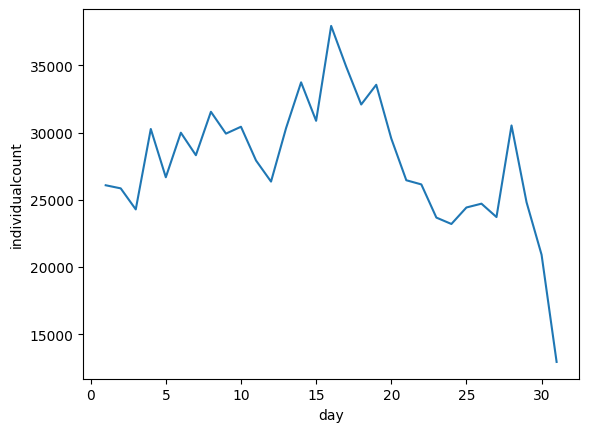

In [ ]:
observations_by_year = df.groupby('day').count()[['individualcount']]
sns.lineplot(data=observations_by_year,x='day',y='individualcount');

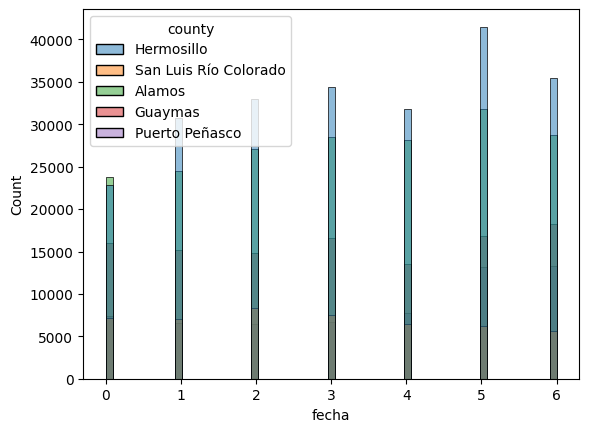

In [ ]:
sns.histplot(data = df[df['county'].isin(top_municipios)], x=df.fecha.dt.day_of_week,hue='county');

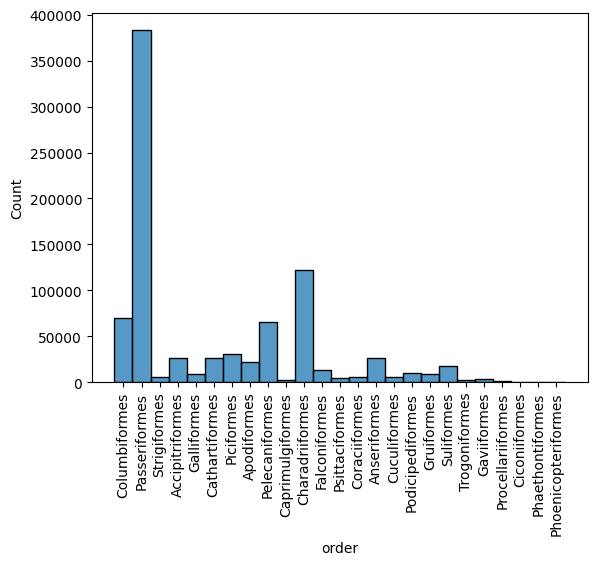

In [62]:
sns.histplot(data=df,x='order')
plt.xticks(rotation=90);

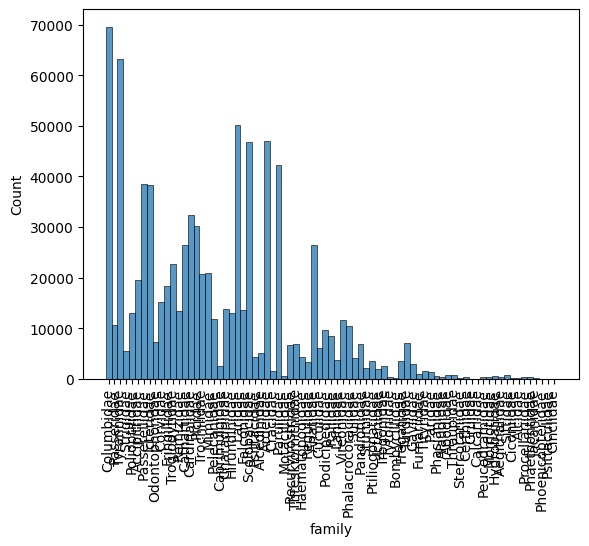

In [ ]:
sns.histplot(data=df,x='family')
plt.xticks(rotation=90);

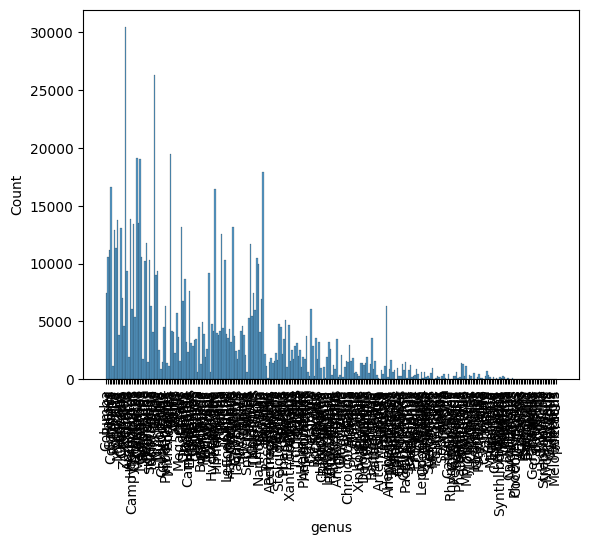

In [65]:
sns.histplot(data=df,x='genus')
plt.xticks(rotation=90);

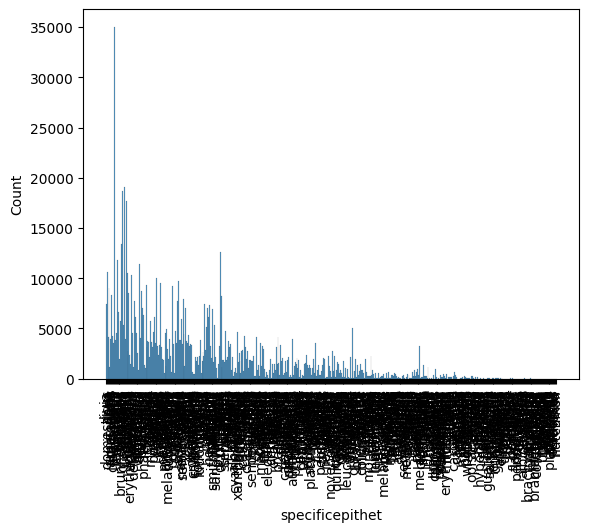

In [66]:
sns.histplot(data=df,x='specificepithet')
plt.xticks(rotation=90);

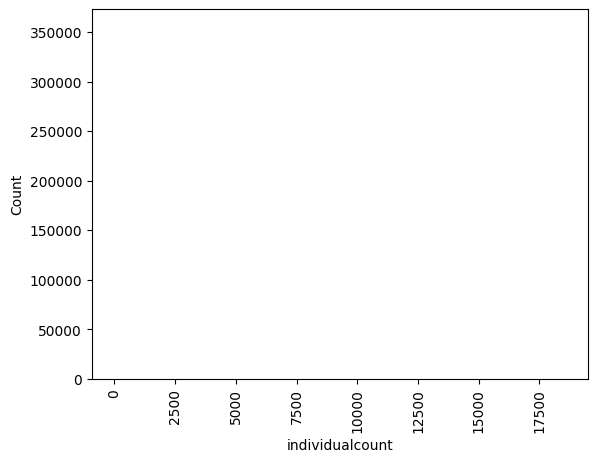

In [71]:
sns.histplot(data=df,x='individualcount')
plt.xticks(rotation=90);

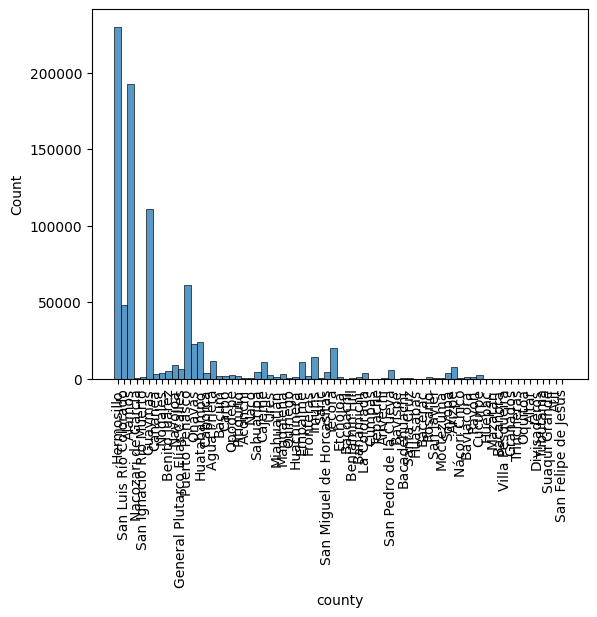

In [69]:
sns.histplot(data=df,x='county')
plt.xticks(rotation=90);

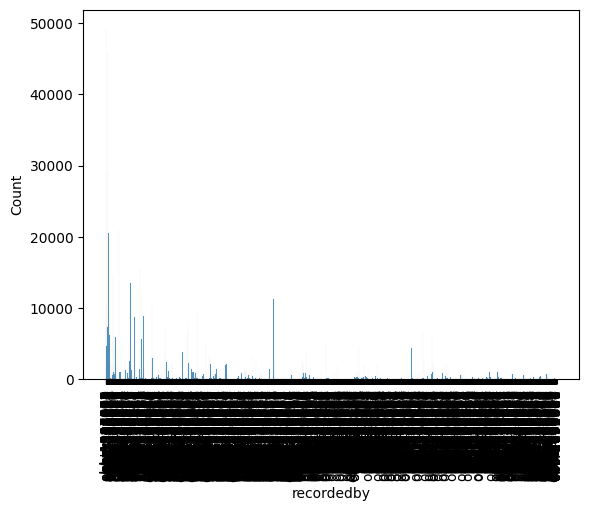

In [70]:
sns.histplot(data=df,x='recordedby')
plt.xticks(rotation=90);

# Agrupamiento

In [16]:
np.log(df['individualcount'])

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
862404    2.302585
862405    1.386294
862406    0.000000
862407    2.708050
862408    0.000000
Name: individualcount, Length: 862409, dtype: float64

In [17]:
presas_year = df.groupby(['locality','year']).agg({'scientificname':pd.Series.nunique,'individualcount':sum})
presas_year.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\3223081978.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  presas_year = df.groupby(['locality','year']).agg({'scientificname':pd.Series.nunique,'individualcount':sum})


scientificname  \
locality                                           year                   
 Real del Alamito                                  2016               1   
"El Oasis", Sonora Mexico                          1986              13   
                                                   1987               9   
#2200 Sebastián Lerdo de Tejada, San Luis Río C... 2024               1   
#39 solimar San Carlos                             2015              46   

                                                         individualcount  
locality                                           year                   
 Real del Alamito                                  2016              3.0  
"El Oasis", Sonora Mexico                          1986             56.0  
                                                   1987             11.0  
#2200 Sebastián Lerdo de Tejada, San Luis Río C... 2024             70.0  
#39 solimar San Carlos                             2015            277.0

In [18]:
presas_especies = df.groupby(['locality']).agg({'year':pd.Series.nunique,'scientificname':pd.Series.nunique,'individualcount':sum})
presas_especies.describe()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\3550804156.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  presas_especies = df.groupby(['locality']).agg({'year':pd.Series.nunique,'scientificname':pd.Series.nunique,'individualcount':sum})


,year,scientificname,individualcount
count,11623.000000,11623.000000,11623.000000
mean,1.476125,15.903639,768.812355
std,2.124160,23.672183,8683.294649
min,1.000000,1.000000,0.000000
25%,1.000000,2.000000,5.000000
50%,1.000000,8.000000,29.000000
75%,1.000000,20.000000,126.000000
max,42.000000,260.000000,407977.000000


In [19]:
presas_especies.iloc[presas_especies['year'].argmax()]

year                   42.0
scientificname        248.0
individualcount    407977.0
Name: Estero Santa Cruz, dtype: float64

In [22]:
presas_especies[presas_especies['year']>2].describe()

,year,scientificname,individualcount
count,886.000000,886.000000,886.000000
mean,6.290068,60.902935,7943.029345
std,5.766889,49.654600,30256.937301
min,3.000000,1.000000,0.000000
25%,3.000000,27.000000,238.250000
50%,4.000000,42.000000,566.000000
75%,6.000000,80.000000,2673.250000
max,42.000000,260.000000,407977.000000


In [23]:
df.groupby(['locality','scientificname']).agg({'individualcount':sum})

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\1752219432.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['locality','scientificname']).agg({'individualcount':sum})


individualcount
locality                                    scientificname                        
 Real del Alamito                           Colaptes chrysoides                3.0
"El Oasis", Sonora Mexico                   Amphispiza bilineata               6.0
                                            Archilochus alexandri              1.0
                                            Auriparus flaviceps                3.0
                                            Bubo virginianus                   2.0
...                                                                            ...
Ímuris                                      Coragyps atratus                  11.0
                                            Corvus corax                       2.0
                                            Passer domesticus                  1.0
Ímuris (just before, arriving from Cananea) Melanerpes lewis                   1.0
Ímuris--Puente Babadac                      Pandion haliaetus                  1.0

[184848 rows x 1 columns]

In [24]:
def shannon_entropy(group):
    counts = group['individualcount']
    total = counts.sum()
    if total == 0:
        return 0
    p = counts / total
    return -(p * np.log(p)).sum()

In [25]:
biodiversity = df.groupby(['locality', 'year']).apply(shannon_entropy).reset_index(name='shannon_entropy')
biodiversity.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\1804252051.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  biodiversity = df.groupby(['locality', 'year']).apply(shannon_entropy).reset_index(name='shannon_entropy')


,locality,year,shannon_entropy
0,Real del Alamito,2016,1.098612
1,"""El Oasis"", Sonora Mexico",1986,3.548450
2,"""El Oasis"", Sonora Mexico",1987,2.145842
3,"#2200 Sebastián Lerdo de Tejada, San Luis Río ...",2024,0.693147
4,#39 solimar San Carlos,2015,3.361540


In [ ]:
sns.lineplot(data=biodiversity, x='year', y='shannon_entropy', hue='locality', marker='o')
plt.legend(title='Locality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

KeyboardInterrupt: 

# Mapa

In [52]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.decimallongitude, df.decimallatitude),
    crs="EPSG:4326"  # WGS84 Lat/Lon coordinate system
)

# Convert to Web Mercator for contextily basemap
gdf = gdf.to_crs(epsg=3857)
gdf.head()

,recordedby,year,month,day,county,decimallatitude,decimallongitude,locality,order,family,genus,specificepithet,vernacularname,individualcount,fecha,geometry
0,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Columbiformes,Columbidae,Columba,livia,Rock Pigeon,1.0,2020-10-20,POINT (-12350002.05 3383437.35)
1,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Passeriformes,Passeridae,Passer,domesticus,House Sparrow,1.0,2020-10-20,POINT (-12350002.05 3383437.35)
2,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Passeriformes,Tyrannidae,Sayornis,saya,Say's Phoebe,1.0,2020-10-20,POINT (-12350002.05 3383437.35)
3,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Columbiformes,Columbidae,Columbina,inca,Inca Dove,1.0,2020-10-20,POINT (-12350002.05 3383437.35)
4,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Strigiformes,Strigidae,Athene,cunicularia,Burrowing Owl,1.0,2020-10-20,POINT (-12350002.05 3383437.35)


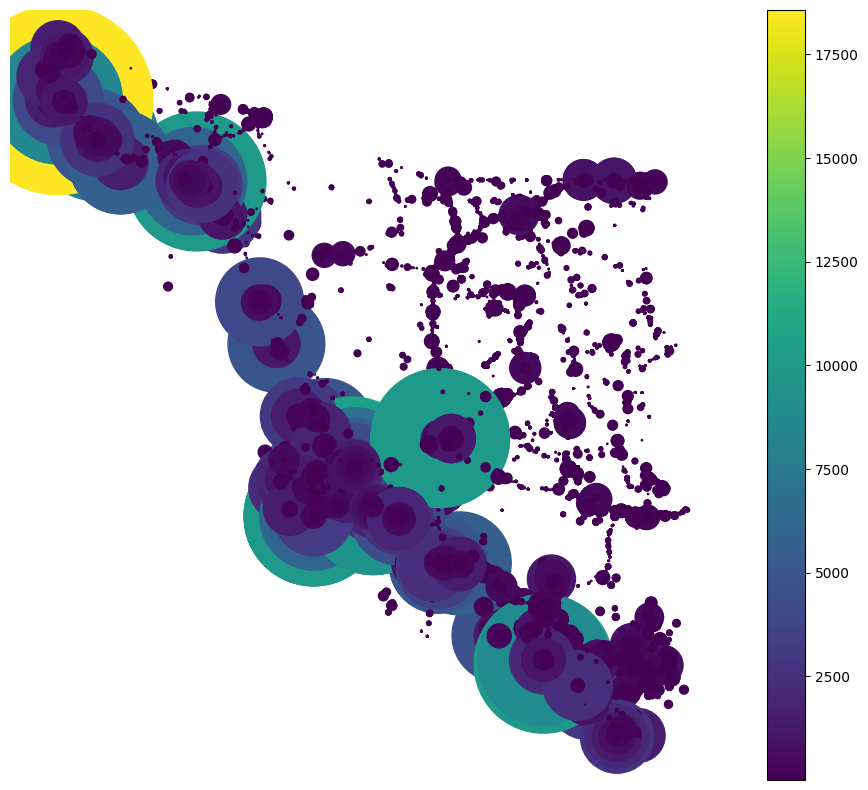

In [53]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='individualcount', cmap='viridis', markersize='individualcount', legend=True, ax=ax)

ax.set_axis_off()

In [ ]:
byGIS = df.groupby(['decimallatitude','decimallongitude'])['individualcount'].sum().reset_index()

# Create a base map centered on average coordinates
m = folium.Map(location=[byGIS.decimallatitude.mean(), byGIS.decimallongitude.mean()], zoom_start=6)

# Use MarkerCluster for better visualization if many points
marker_cluster = MarkerCluster().add_to(m)

# Add points with popup showing Shannon entropy and other info
for _, row in byGIS.iterrows():
    folium.CircleMarker(
        location=[row['decimallatitude'], row['decimallongitude']],
        radius=7,
        popup=f"Total: {row['individualcount']:.2f}",
        color='blue',
        fill=True,
        fill_opacity=0.7
    ).add_to(marker_cluster)

# Save or display map
m.save('biodiversity_map.html')
m  # if in Jupyter notebook, this will display the interactive map
